In [ ]:
from scipy.fftpack import fft;
import matplotlib.pyplot as plt;
import numpy as np;

Señal de ejemplo: Senosoide con ruido

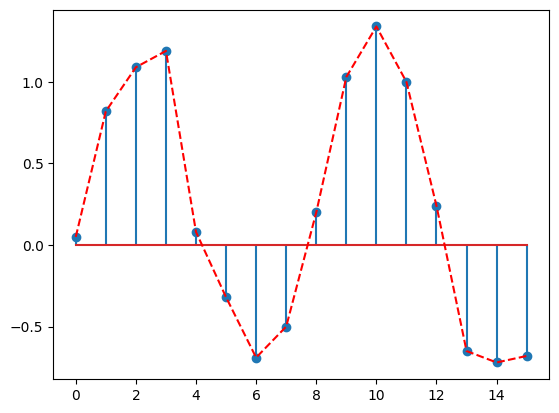

In [ ]:
x = [0.05,0.82,1.09,1.19,0.08,-0.32,-0.69,-0.5,0.2,1.03,1.34,1.0,0.24,-0.65,-0.72,-0.68]
x = np.asarray(x)
plt.stem(x)
plt.plot(x,'r--')
plt.show()

Método directo

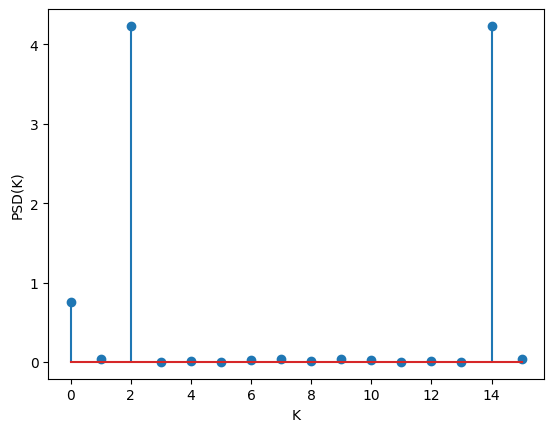

In [ ]:
P_estimado = (1/len(x))*np.power(np.abs(np.fft.fft(x)),2)

plt.stem(P_estimado)
plt.xlabel('K')
plt.ylabel('PSD(K)')
plt.show()

Periodograma modificado

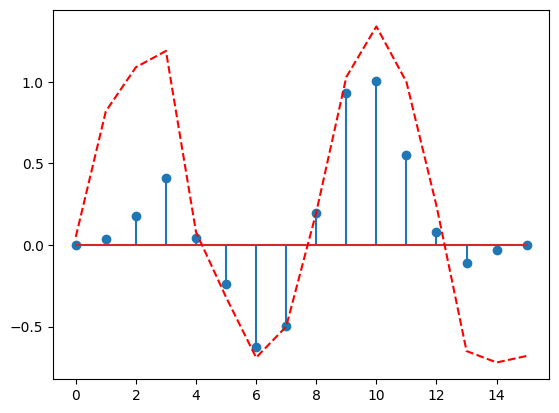

In [ ]:
x = [0.05,0.82,1.09,1.19,0.08,-0.32,-0.69,-0.5,0.2,1.03,1.34,1.0,0.24,-0.65,-0.72,-0.68]
w = np.hanning(16)
x_w = np.asarray(x)*w
plt.stem(x_w)
plt.plot(x,'r--')
plt.show()

0.3515625


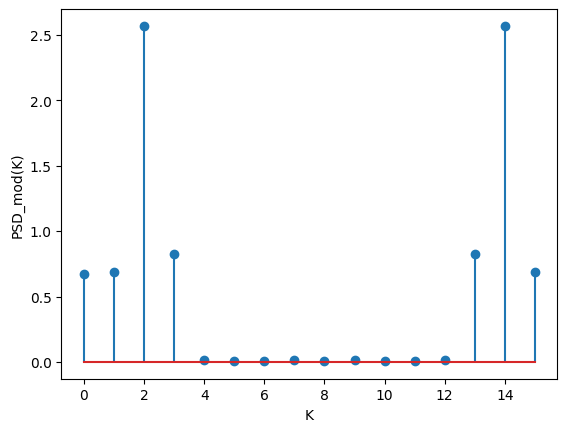

In [ ]:
U = (1/len(w))*np.sum(np.power(np.abs(w),2))
print(U)

P_estimado = (1/(len(x_w)*U))*np.power(np.abs(np.fft.fft(x_w)),2)

plt.stem(P_estimado)
plt.xlabel('K')
plt.ylabel('PSD_mod(K)')
plt.show()

Qué pasa con el bias?

Barttlet partiendo la señal en la mitad para tomar un ciclo completo

0.328125


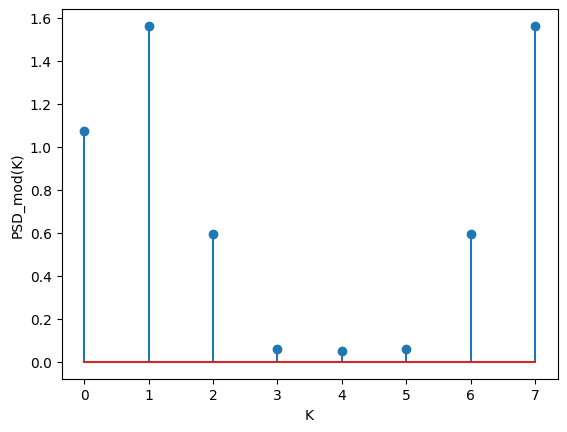

In [ ]:
x1 = x[0:int(len(x)/2)]
x2 = x[int(len(x)/2):]

w = np.hanning(len(x1))

U = (1/len(w))*np.sum(np.power(np.abs(w),2))
print(U)

x1_w = x1*w
P1_estimado = (1/(len(x1_w)*U))*np.power(np.abs(np.fft.fft(x1_w)),2)

x2_w = x2*w
P2_estimado = (1/(len(x2_w)*U))*np.power(np.abs(np.fft.fft(x2_w)),2)

P_estimado = (P2_estimado + P1_estimado)/2

plt.stem(P_estimado)
plt.xlabel('K')
plt.ylabel('PSD_mod(K)')
plt.show()

Qué pasó con la resolución?

Welch
8 muestras, solapamiento del 50%

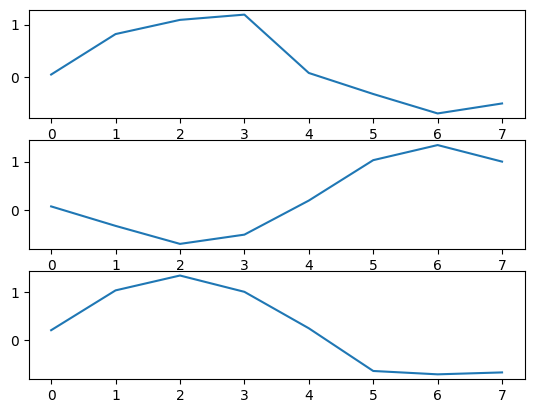

In [ ]:
x1 = x[0:int(len(x)/2)]
x2 = x[4:12]
x3 = x[int(len(x)/2):]

plt.subplot(3,1,1)
plt.plot(x1)
plt.subplot(3,1,2)
plt.plot(x2)
plt.subplot(3,1,3)
plt.plot(x3)
plt.show()

0.328125


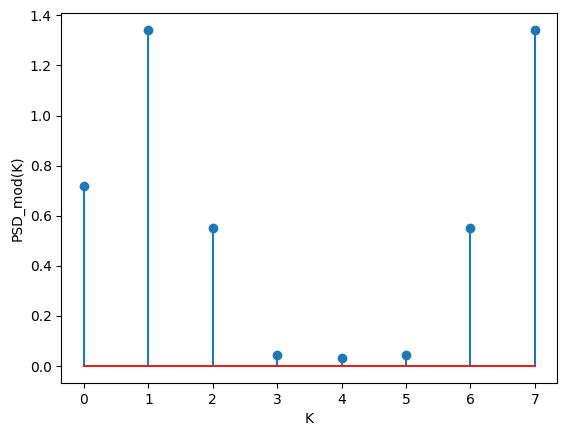

In [ ]:
w = np.hanning(len(x1))

U = (1/len(w))*np.sum(np.power(np.abs(w),2))
print(U)

x1_w = x1*w
P1_estimado = (1/(len(x1_w)*U))*np.power(np.abs(np.fft.fft(x1_w)),2)

x2_w = x2*w
P2_estimado = (1/(len(x2_w)*U))*np.power(np.abs(np.fft.fft(x2_w)),2)

x3_w = x3*w
P3_estimado = (1/(len(x3_w)*U))*np.power(np.abs(np.fft.fft(x3_w)),2)

P_estimado = (P2_estimado + P1_estimado + P3_estimado)/3

plt.stem(P_estimado)
plt.xlabel('K')
plt.ylabel('PSD_mod(K)')
plt.show()

Qué se mejoró?

In [ ]:
# Number of samplepoints
N = 2000;

# sample spacing
fs = 500;
T = 1.0 / fs;

#sinosoid with two armonic
x = np.linspace(0.0, N*T, N); #4 second of the signal
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x);

#la frecuencia de muestreo debería ser 160 y tomamos 500, sobremuestreamos

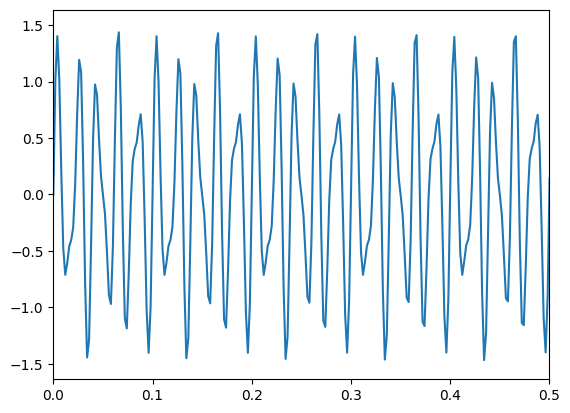

In [ ]:
plt.plot(x,y)
plt.xlim([0,0.5])
plt.show()

In [ ]:
#frequency resolution fs/N
yf = fft(y);
xf = np.arange(0.0, fs, fs/N);

print(yf)

[1.03028697e-13-0.j         9.83279085e-06-0.00625974j
 3.93336987e-05-0.01252026j ... 8.85103485e-05+0.01878234j
 3.93336987e-05+0.01252026j 9.83279085e-06+0.00625974j]


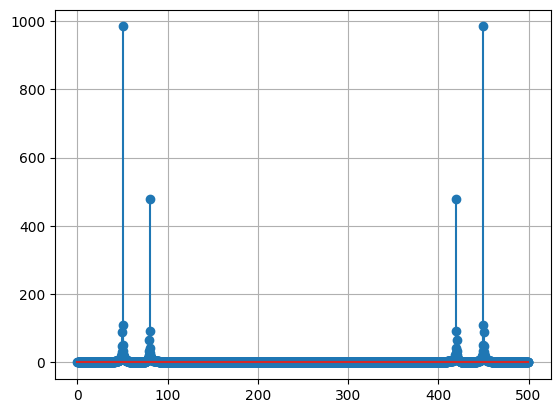

In [ ]:
plt.stem(xf, np.abs(yf));
#plt.xlim([47,55])
plt.grid();
plt.show();

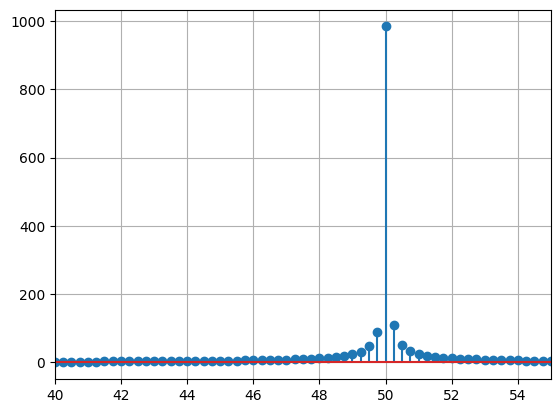

In [ ]:
plt.stem(xf, np.abs(yf));
plt.xlim([40,55])
plt.grid();
plt.show();

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#manejo de elemeotos del sistema, como carpetas
import os;
import scipy.io as sio;


#se trabaja este en la misma carpeta de los datos para que pueda funcionar
data = sio.loadmat('/content/drive/Shareddrives/biosenales_sistemas/ejemplo_analisis_espectral/sco932_res_PREP_bipolar_montage_2s.mat');
data = data['data'];

print(data.shape) #sensores x puntos x epocas/segmentos/repeticiones

(6, 2000, 201)


In [ ]:
fs = 1000; #ya es conocida, la da el constructor del equipo
T = 1.0 / fs;

#sacamos del primero sensor la primera repeticion
Y = data[0,:,0];
N = Y.shape[0]
x = np.linspace(0.0, N*T, N);

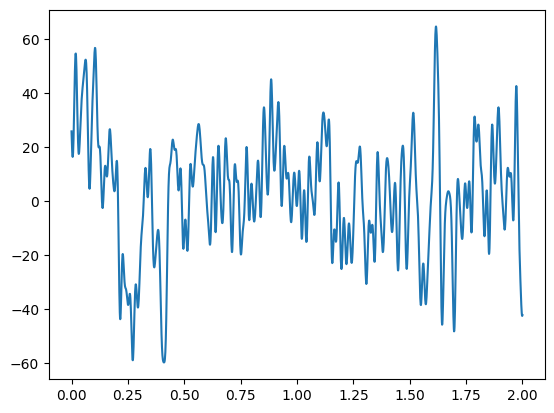

In [ ]:
plt.plot(x,Y)
plt.show()

In [ ]:
#frequency resolution fs/N
yf = fft(Y);
xf = np.arange(0.0, fs, fs/N);

print(yf)

[4346.4087    -0.j       308.87543 -128.07845j 8844.751  +5395.754j   ...
 6140.6943 +1012.97034j 8844.751  -5395.754j    308.87543 +128.07845j]


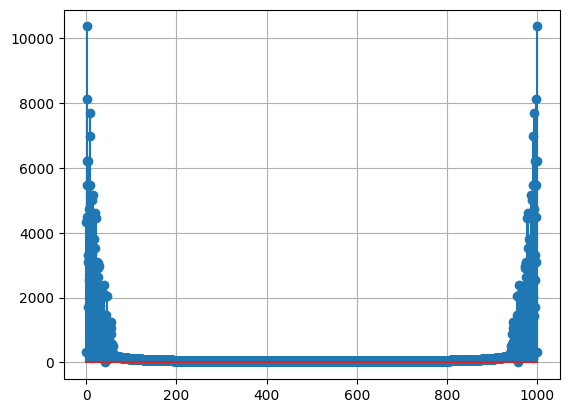

In [ ]:
plt.stem(xf, np.abs(yf));
plt.grid();
plt.show();

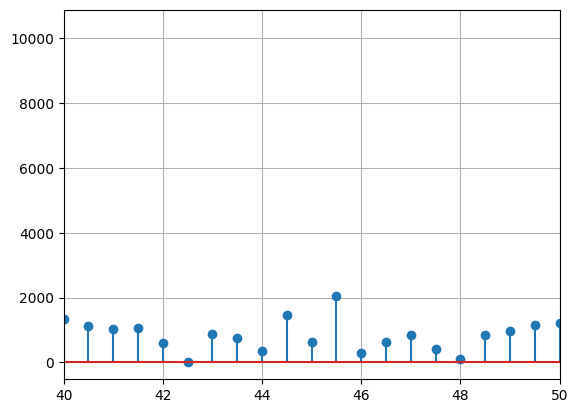

In [ ]:
plt.stem(xf, np.abs(yf));
plt.xlim([40,50])
plt.grid();
plt.show();



In [ ]:
fs = 1000;
T = 1.0 / fs;

canal0 = data[0,:,:];
Y = np.squeeze(np.reshape(canal0,(1,2000*201),order='F'));
N = Y.shape[0]
x = np.linspace(0.0, N*T, N);
print(Y.shape)

(402000,)


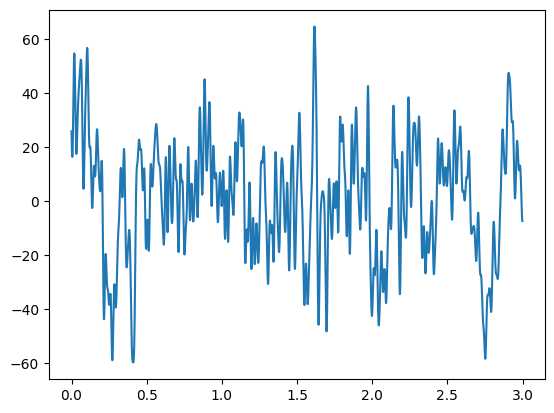

In [ ]:
plt.plot(x[:3000],Y[:3000])
plt.show()

[3229.96    -0.j     5592.645-6163.227j  5906.008 +866.4422j ...
 6416.499  +74.9977j 5906.008 -866.4422j 5592.645+6163.227j ]


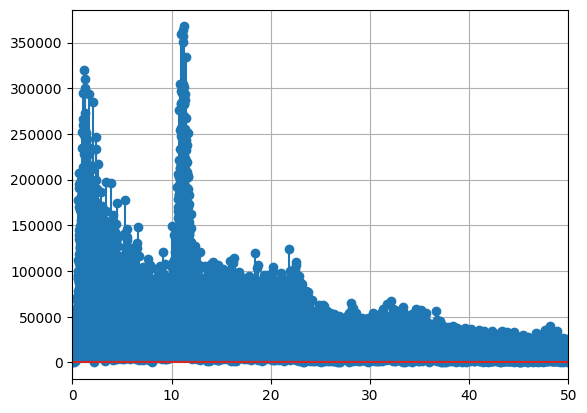

In [ ]:
#frequency resolution fs/N
yf = fft(Y);
xf = np.arange(0.0, fs, fs/N);

print(yf)

#espectro magnitud
plt.stem(xf[xf < 50], np.abs(yf[xf < 50]));
plt.grid();
plt.xlim([0,50])
plt.show();

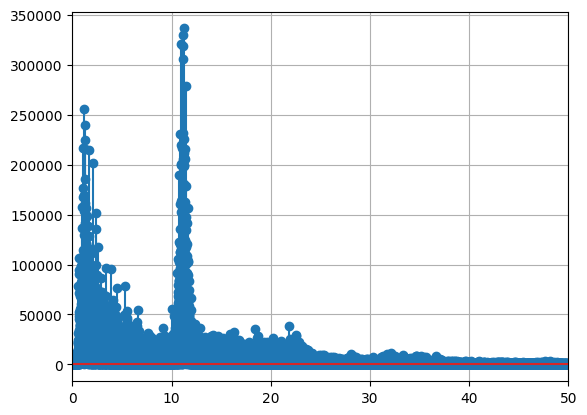

In [ ]:
#estimacion metodo directo

#densidad espectral de potencia / periodograma
plt.stem(xf[xf < 50], (1/N)*np.power((np.abs(yf[xf < 50])),2));
plt.grid();
plt.xlim([0,50])
plt.show();


In [ ]:
# Number of samplepoints
N = 2000;

# sample spacing
fs = 500;
T = 1.0 / fs;

epocas = 100
#sinosoid with two armonic
x = np.linspace(0.0, N*T, N); #4 second of the signal
y1 = np.zeros((N,epocas))
yf = np.zeros((N,epocas))

for e in range(epocas):
  y1[:,e] = np.sin(40.0 * 2.0*np.pi*x) #+ 0.5*np.sin(80.0 * 2.0*np.pi*x);

In [ ]:
#estimación Barttlet (epocas sin solapamiento)
#1. calcular el periodograma de cada segmento
#2. promediar los periodogramas encontrados

for e in range(epocas):
  #haciendo 1
  yf[:,e] = (1/N)*np.power(np.abs(fft(y1[:,e])),2)

Ypsd = np.mean(yf,axis=1)

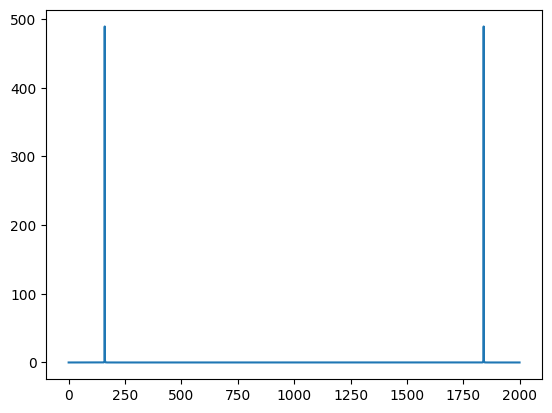

In [ ]:
plt.plot(Ypsd)

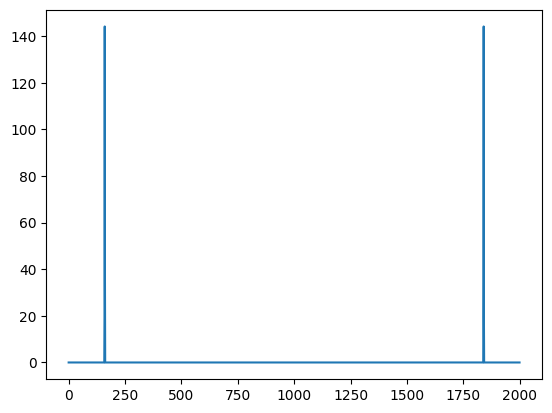

In [ ]:
#estimación Barttlet (epocas sin solapamiento)
#1. calcular el periodograma de cada segmento multiplicado por una ventana
#2. promediar los periodogramas encontrados

for e in range(epocas):
  #haciendo 1
  yf[:,e] = (1/N)*np.power(np.abs(fft(np.multiply(y1[:,e],np.hamming(N)))),2)

Ypsd = np.mean(yf,axis=1)

plt.plot(Ypsd)

*** Análisis espectral ***

In [ ]:
#manejo de elemeotos del sistema, como carpetas
import scipy.io as sio;
import numpy as np;
import matplotlib.pyplot as plt

#se trabaja este en la misma carpeta de los datos para que pueda funcionar
data = sio.loadmat('/content/drive/Shareddrives/biosenales_sistemas/ejemplo_analisis_espectral/sco932_res_PREP_bipolar_montage_2s.mat');
data = data['data'];

print(data.shape)

(6, 2000, 201)


In [ ]:
#%% CONTINUA
sensores = data.shape[0];
puntos = data.shape[1];
epocas = data.shape[2];

senal_continua = np.reshape(data,(sensores, puntos*epocas), order = 'F');

[ 25.951843 172.29614   88.63594  ... 102.430565  88.63594  172.29614 ]


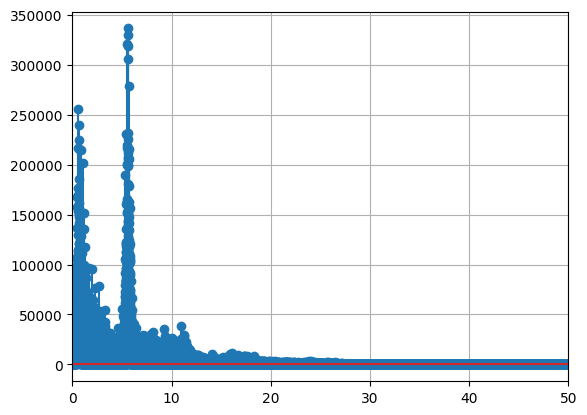

In [ ]:
N = np.shape(senal_continua)[1]

#calcular la PSD
#frequency resolution fs/N
yf = (1/N)*np.power(np.abs(fft(Y)),2);
xf = np.arange(0.0, fs, fs/N);

print(yf)

plt.stem(xf[xf < 50], np.abs(yf[xf < 50]));
plt.grid();
plt.xlim([0,50])
plt.show();

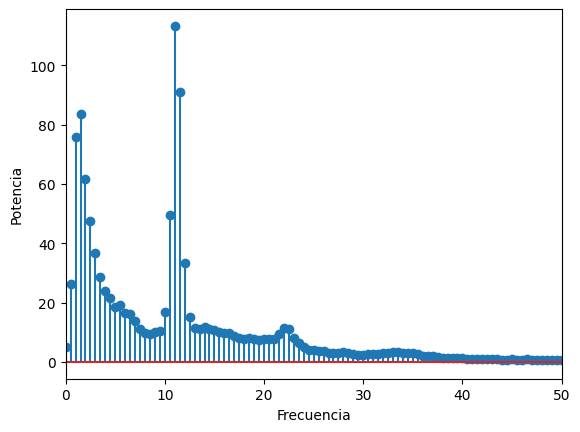

In [ ]:
##@title Default title text (parte en dos la ventana)
#importamos la rutina de welch
from scipy.signal import welch as pwelch

#%% USANDO WELCH
fs = 1000;

nperseg = 2000
noverlap = int(nperseg/2);

f, Pxx = pwelch(senal_continua[0,:], fs, 'hann', nperseg, noverlap);
#graficamos frecuencia vs potencia
plt.stem(f, Pxx);
plt.xlabel('Frecuencia');
plt.ylabel('Potencia');
plt.xlim([0, 50]); #rango para el eje X
plt.show();

#print(Pxx)

In [ ]:
print(Pxx.shape)

(1001,)


In [ ]:
delta = np.sum(Pxx[f <= 4]);
print("Delta: " + str(delta));
theta = np.sum(Pxx[f <= 8]) - delta;
print("Theta: " + str(theta));
alfa = np.sum(Pxx[f <= 13]) - theta - delta;
print("Alfa: " + str(alfa));
beta = np.sum(Pxx[f <= 30]) - alfa - theta - delta;
print("Beta: " + str(beta));

total = np.sum(Pxx[f <= 30]);
delta_relativo = delta/total;
theta_relativo = theta/total;
alfa_relativo = alfa/total;
beta_relativo = beta/total;

print(str([delta_relativo, theta_relativo, alfa_relativo, beta_relativo]));

Delta: 389.12988
Theta: 126.55603
Alfa: 360.21277
Beta: 234.21191
[0.35053253, 0.114003085, 0.32448366, 0.2109807]


In [ ]:
#%%
def potencia_relativa(senal):
    num_puntos_por_segundo = 250;

    nperseg = 2048
    noverlap = int(nperseg/2);

    f, Pxx = pwelch(senal, num_puntos_por_segundo, 'hann', nperseg, noverlap);

    #se extrae la potencia de cada banda
    delta = np.sum(Pxx[f <= 4]);
    theta = np.sum(Pxx[(f > 4) & (f <= 8)]);
    alfa = np.sum(Pxx[(f > 8) & (f <= 13)]);
    beta = np.sum(Pxx[(f > 13) & (f <= 30)]);
    #se extrae la potencia total
    total = np.sum(Pxx[f <= 30]);

    #se extrae la potencia relativa
    delta_relativo = delta/total;
    theta_relativo = theta/total;
    alfa_relativo = alfa/total;
    beta_relativo = beta/total;

    #convertimos una lista en python a un ndarray de numpy
    resultado = np.asarray([delta_relativo, theta_relativo, alfa_relativo, beta_relativo]);
    return resultado

#llamo la rutina
resultado = potencia_relativa(senal_continua[0,:]);
print(resultado)

[0.7920898  0.15770943 0.04717418 0.00302662]


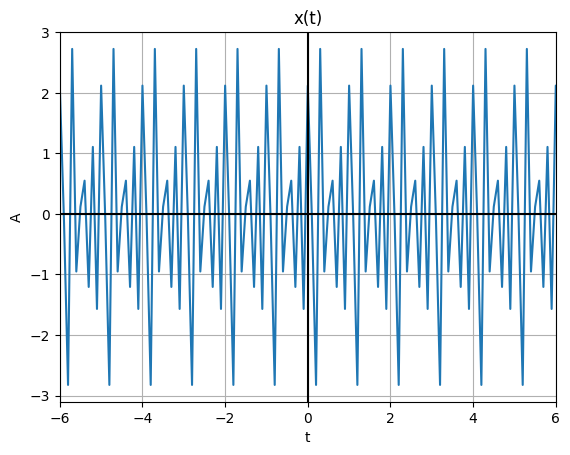

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,18,0.1)
y = np.sin(6*np.pi*x+(np.pi/2))+(1/2)*np.cos(4*np.pi*x+(np.pi/4))+2*np.sin(8*np.pi*x+(np.pi/8))

plt.plot(x-6,y)
plt.axvline(x=0,color='BLACK')
plt.axhline(y=0,color='BLACK')
plt.xlabel('t')
plt.ylabel('A')
plt.title('x(t)')
plt.xlim(-6,6)
plt.grid()
plt.show()